# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [52]:
# Your code here - load the dataset
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import root_mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt

data = pd.read_csv('ames.csv', index_col=0)

Visually inspect `ames` (it's ok if you can't see all of the columns).

In [34]:
# Your code here
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [35]:
# Your code here - drop columns with missing data
data.dropna(axis=1, inplace=True)

## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

In [36]:
# Your code here - continuous numeric predictor
CNP = data['GrLivArea']

### Discrete Numeric Predictor

In [37]:
# Your code here - discrete numeric predictor
DNP = data['YrSold']

### String Categorical Predictor

In [38]:
# Your code here - string categorical predictor
SCP = data[['ExterCond']]

### Discrete Categorical Predictor

In [39]:
# Your code here - discrete categorical predictor
DCP = data[['OverallQual']]

## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [44]:
# Your code here - prepare X and y, including one-hot encoding

cond_encoder = OneHotEncoder(categories='auto', sparse_output=False, drop='first').set_output(transform='pandas')
qual_encoder = OneHotEncoder(categories='auto', sparse_output=False, drop='first').set_output(transform='pandas')

cond_transformed = cond_encoder.fit_transform(SCP)
qual_transformed = qual_encoder.fit_transform(DCP)
X = pd.concat([CNP, cond_transformed, qual_transformed], axis=1)
y = data['SalePrice']

In [41]:
cond_transformed

,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA
Id,,,,
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,1.0
...,...,...,...,...
1456,0.0,0.0,0.0,1.0
1457,0.0,0.0,0.0,1.0
1458,0.0,1.0,0.0,0.0


In [42]:
X

,GrLivArea,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10
Id,,,,,,,,,,,,,,
1,1710,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1262,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1786,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1717,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,2198,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1647,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1457,2073,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1458,2340,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
# Your answer here - which category or categories were dropped?


In [46]:
# Your code here - build a regression model and display results
model = sm.OLS(y, sm.add_constant(X))
model_results = model.fit()
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     332.4
Date:                Fri, 15 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:40:53   Log-Likelihood:                -17493.
No. Observations:                1460   AIC:                         3.502e+04
Df Residuals:                    1445   BIC:                         3.509e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           9338.0061   3.64e+04      0.

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

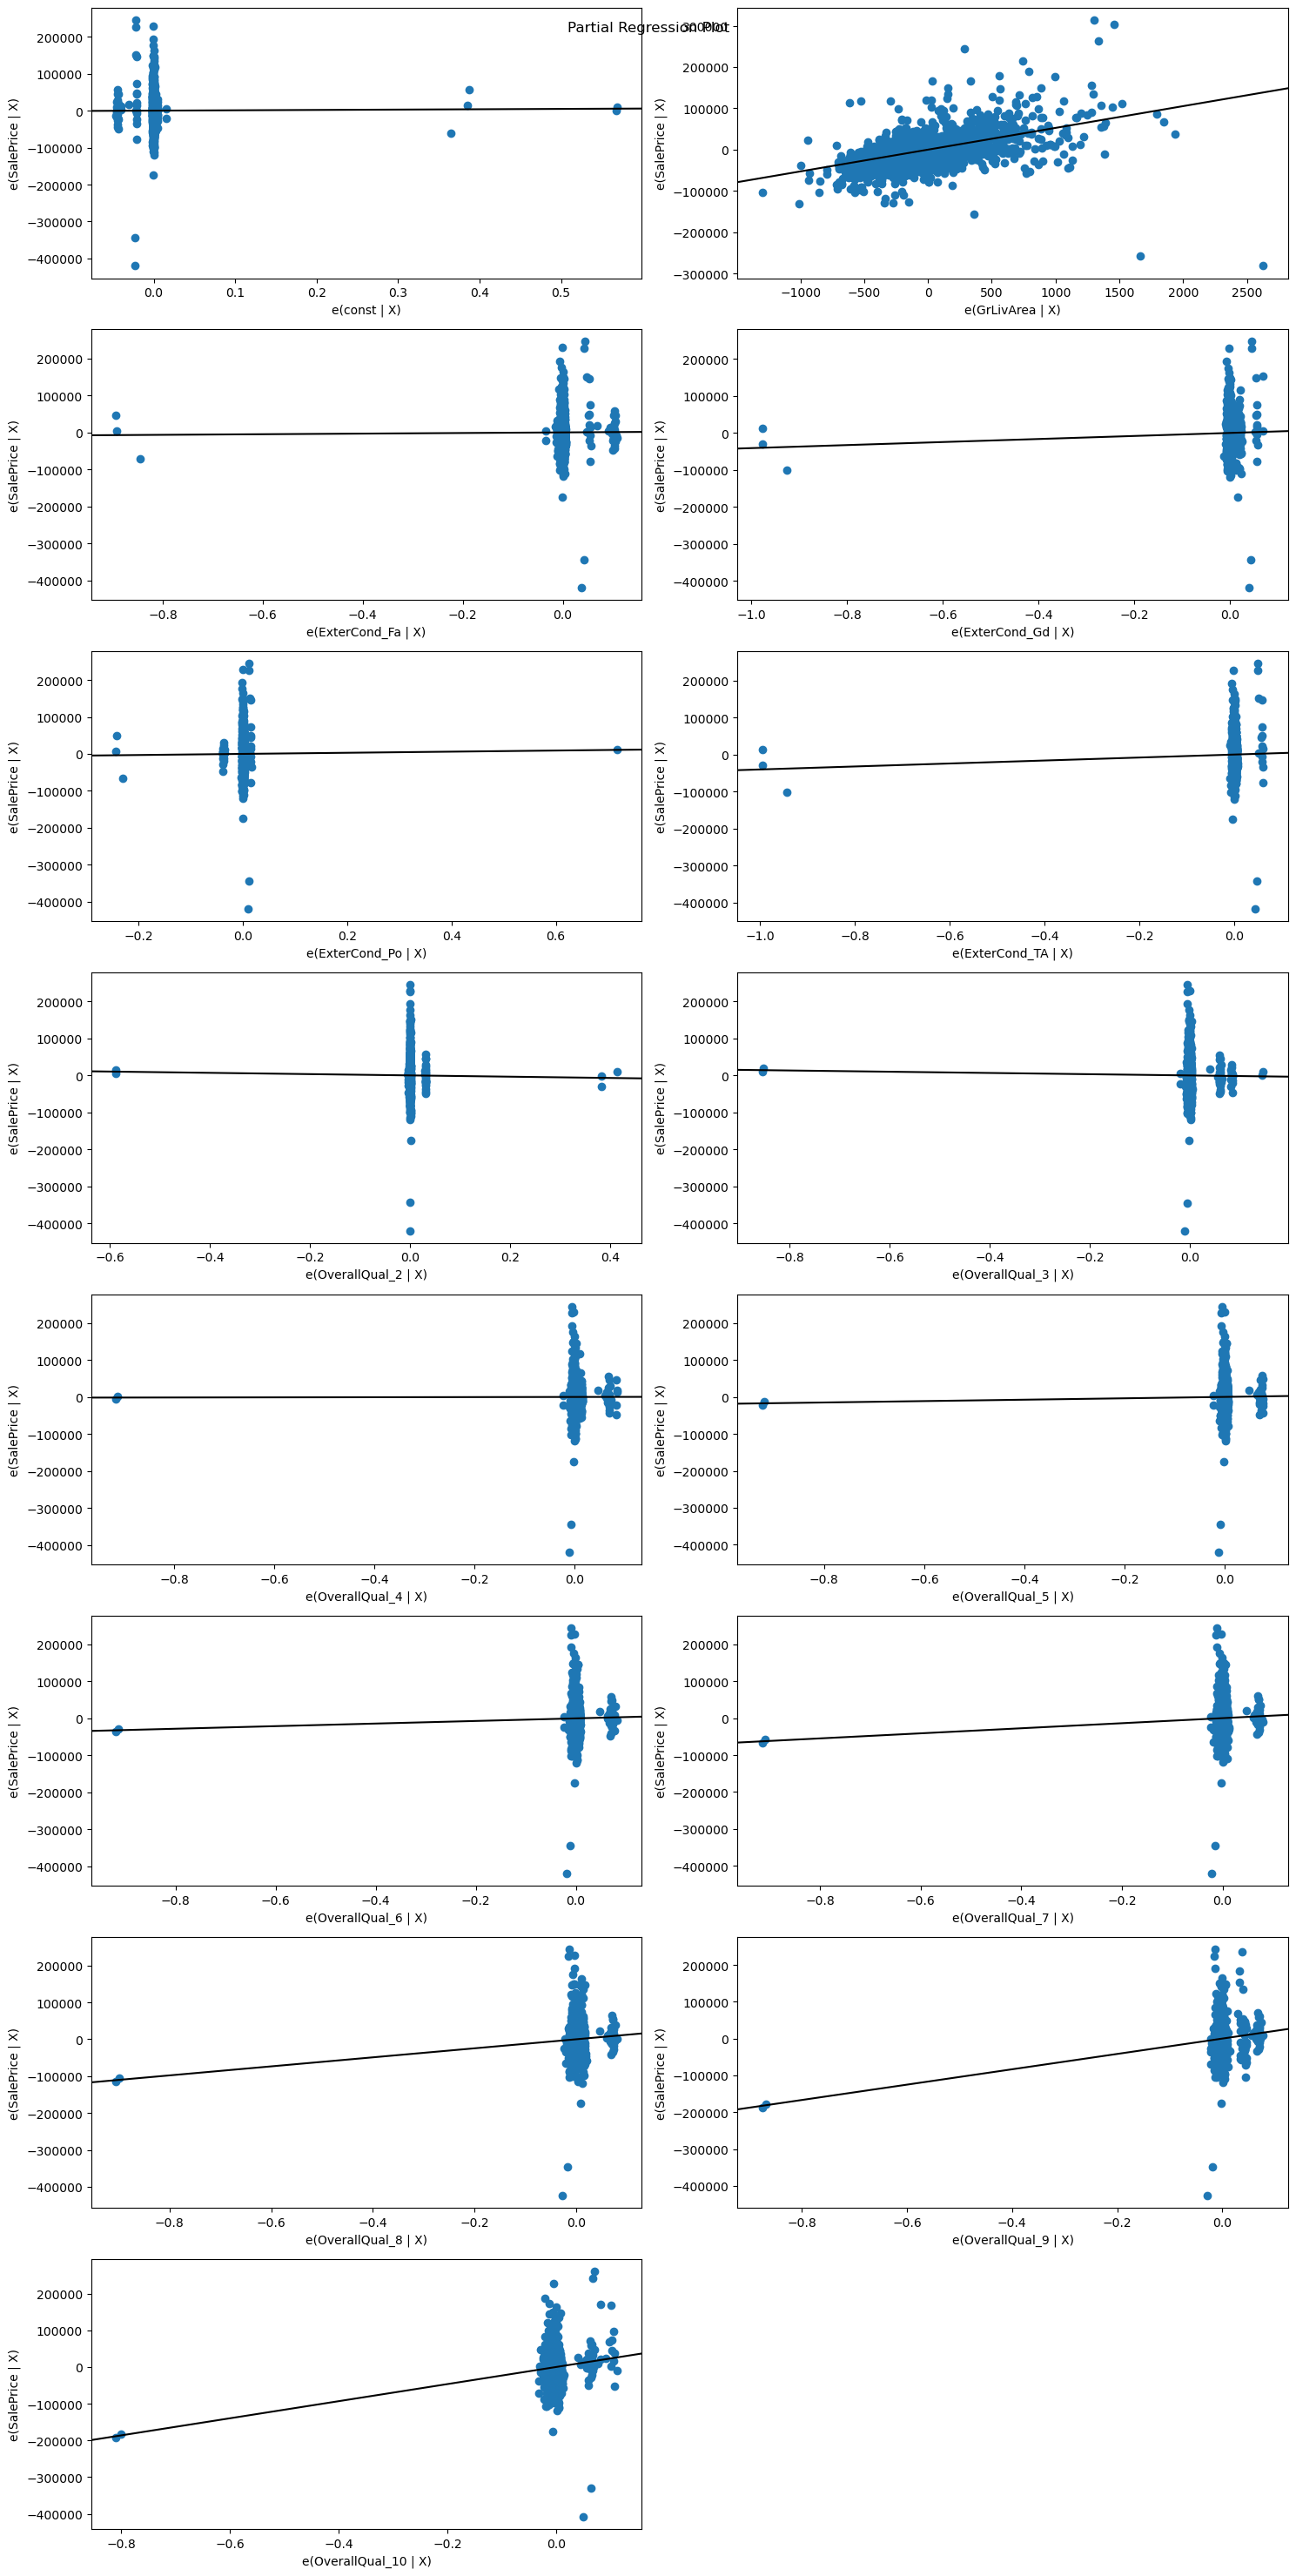

In [51]:
# Your code here - create partial regression plots
fig = plt.figure(figsize=(15,30))
sm.graphics.plot_partregress_grid(model_results, fig=fig)
plt.tight_layout()
plt.show()

## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [59]:
# Your code here - calculate an error-based metric
rmse = ((model_results.resid ** 2).sum() / len(y)) ** 0.5
MAE = ((model_results.resid.abs()).sum()/len(y))
print(f"RMSE:\t{rmse}]\nMAE:\t{MAE}")

RMSE:	38655.77592792678]
MAE:	25787.80499275665


## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [61]:
# Your answer here
# The RMSE is 38,656 and the MAE is 25,788 which are both quite substantial figures. The model currently captures 70% of the variance of sale price, 
# thus the best option may be to add more features to the model and make it more complex 


## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [38]:
# Your code here

## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.